In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import time
from os import listdir

In [2]:
# Load speaker attributes from Google Drive
speaker_attributes = pd.read_parquet('/content/drive/MyDrive/ADA/Project datasets/speaker_attributes.parquet')
speaker_attributes.shape

(9055981, 15)

In [17]:
# Load dataset containing sport quotes
dataset = pd.read_csv('/content/drive/MyDrive/ADA/ada-sports-quotes/sport-quotes-2020.csv.bz2', compression='bz2')
dataset.shape

(641614, 10)

In [18]:
dataset.sample(3)

,Unnamed: 0,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
163621,1336848,2020-01-24-106995,"We're pretty confident again,",None,[],2020-01-24 03:40:20,1,"[['None', '0.8296'], ['Kathy Walker', '0.1704']]",['https://www.echopress.com/sports/swimming-an...,E
54936,449446,2020-02-20-021022,He's not playing tonight... doubtful for this ...,Claude Julien,['Q268386'],2020-02-20 18:52:32,3,"[['Claude Julien', '0.6016'], ['None', '0.3464...",['http://thechronicleherald.ca/sports/hockey/c...,E
189655,1548506,2020-02-22-028136,So he connects with them on an individual leve...,None,[],2020-02-22 18:00:00,1,"[['None', '0.9237'], ['Tim Baldwin', '0.0763']]",['http://postandcourier.com/sports/from-girls-...,E


In [19]:
# Removing square brackets and quotation marks from qids to match the speaker_attributes dataset
dataset['qids'] = dataset['qids'].str.strip('[\'\']')
speakers = speaker_attributes[speaker_attributes['id'].isin(dataset['qids'])]

In [20]:
# Removing speakers without any known party
politicians = speakers[~(speakers['party'].isna())]
politicians.shape

(2149, 15)

In [21]:
# Load the database relating qids with wikidata labels
qid_labels = pd.read_csv('/content/drive/MyDrive/ADA/Project datasets/wikidata_labels_descriptions_quotebank.csv.bz2', compression='bz2', index_col='QID')

In [22]:
############# A DISCUTER ################################

# Only keeping the first qid in the party feature
politicians_1_qid = politicians['party'].str.get(0)
politicians_1_qid.shape

(2149,)

In [23]:
# Counts the occurences of each party and merging the corresponding label
party_counts_1_qid = pd.DataFrame(pd.value_counts(politicians_1_qid))
party_counts_label_1_qid = party_counts_1_qid.merge(qid_labels, left_index=True, right_on='QID').rename(columns={'party': 'count'})
party_counts_label_1_qid.head(3)

,count,Label,Description
QID,,,
Q29552,441,Democratic Party,political party in the United States
Q29468,433,Republican Party,major political party in the United States
Q9626,80,Conservative Party,political party in the United Kingdom


In [27]:
# Setting label of party with count lower than the .99 quantile to 'Others'
threshold_value = party_counts_label_1_qid['count'].quantile(.99)
values_below_thresh = party_counts_label_1_qid['count'] < threshold_value
party_counts_label_1_qid.loc[values_below_thresh,'Label'] = 'Others'

# Plots : pie plot and bar plot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9fc7613a50>],
      dtype=object)

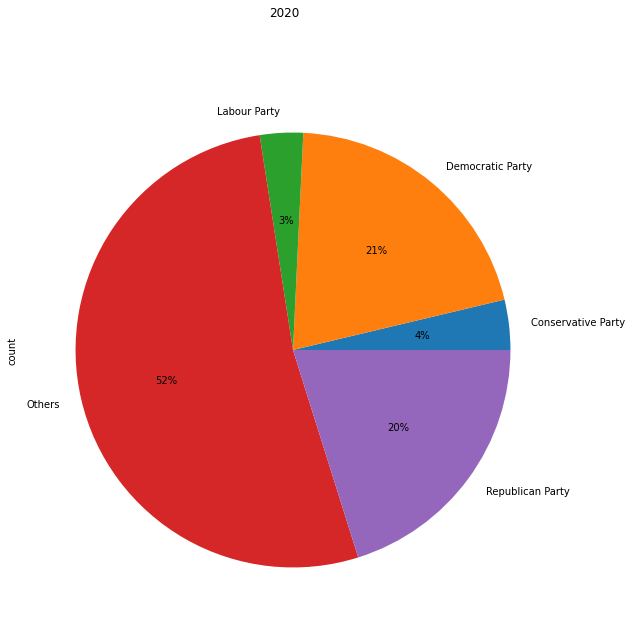

In [31]:
party_counts_label_1_qid.groupby('Label').sum().plot(kind='pie', subplots=True, figsize=(10, 10), legend=False, autopct='%1.f%%',title='2020')

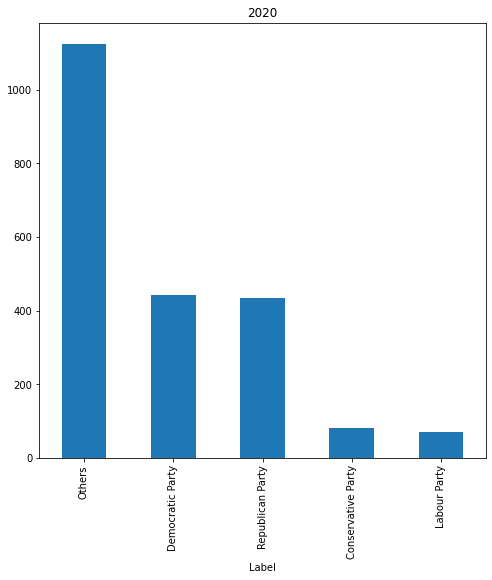

In [32]:
party_counts_label_1_qid.groupby('Label').sum().sort_values(by='count', ascending=False).plot(kind='bar',legend=False, figsize=(8, 8), log=False, title='2020')